# 비지도학습 과제
### 전처리 2차시에서 진행한 실습에서 이어지는 내용입니다.
### 2차시에서 최종적으로 저장한 hyundi_preprocessed.csv 파일을 활용해 비지도학습 클러스터링을 진행합니다.

### 파일 불러오기

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('hyundi_preprocessed.csv', index_col=0)

In [3]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,7,2017,7999,0,17307,0,145.0,58.9,1.2
1,12,2016,14499,2,25233,2,235.0,43.5,2.0
2,12,2016,11399,0,37877,2,30.0,61.7,1.7
3,5,2016,6499,0,23789,0,20.0,60.1,1.0
4,6,2015,10199,0,33177,2,160.0,51.4,2.0
...,...,...,...,...,...,...,...,...,...
4854,15,2019,29995,3,1567,2,145.0,39.8,2.2
4856,9,2015,7830,0,59508,2,30.0,65.7,1.7
4857,5,2017,6830,0,13810,0,20.0,60.1,1.0
4858,12,2018,13994,0,23313,0,145.0,44.8,1.6


# 지금부터 df를 활용해 K-means Clustering을 진행하시면 됩니다.
* 다양한 클러스터를 만들며, 클러스터링에 익숙해지는 자유도 높은 과제 입니다.
* 비지도학습 K-means Clustering 강의 및 자료를 활용해 현대 중고차에 대한 클러스터링 분석을 자유롭게 진행해보세요.
* 분석을 위해 모든 열을 다 사용해도 되고, 몇 가지 열을 골라서 진행해도 됩니다!

In [4]:
# 분석을 진행할 열 3개를 가져옵니다.
df_new = df[['price','year','mileage']]

df_new

,price,year,mileage
0,7999,2017,17307
1,14499,2016,25233
2,11399,2016,37877
3,6499,2016,23789
4,10199,2015,33177
...,...,...,...
4854,29995,2019,1567
4856,7830,2015,59508
4857,6830,2017,13810
4858,13994,2018,23313


In [5]:
from sklearn.cluster import KMeans

# KMeans 클러스터링 모델 생성
km = KMeans(n_clusters=3,       #클러스터의 개수
            init ='random',     #초기 클러스터의 중심을 정하는 매개변수 --> 랜덤으로 설정
            n_init = 10,        #군집화(클러스터링)을 진행할 때 몇 번 초기화를 하는가
            max_iter = 300,     #KMeans Clustering을 최대 몇 번 반복할 것인가(centroid가 안 변하면 300번 전에 끝남)
            tol = 1e-04,        #알고리즘이 수렴되었다고 판단하는 오차값의 기준
            random_state=0)

# 클러스터링 수행
y_km = km.fit_predict(df_new)        #KMeans clustering을 진행

# 클러스터링 결과 출력
df_new['cluster_label'] = y_km
print(df_new)

      price  year  mileage  cluster_label
0      7999  2017    17307              1
1     14499  2016    25233              0
2     11399  2016    37877              0
3      6499  2016    23789              0
4     10199  2015    33177              0
...     ...   ...      ...            ...
4854  29995  2019     1567              1
4856   7830  2015    59508              2
4857   6830  2017    13810              1
4858  13994  2018    23313              0
4859  15999  2016    11472              1

[4592 rows x 4 columns]


C:\Users\rlehd\AppData\Local\Temp\ipykernel_19744\1376203929.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['cluster_label'] = y_km


In [26]:
# 클러스터 중심점 확인
centers = km.cluster_centers_[:, 0:3]  # 중심을 확인하는 코드를 넣어주세요

centers

array([[10718.08785845,  2016.39414277, 30205.25930445],
       [14939.21289062,  2018.11367187,  9196.28359375],
       [ 8022.79643766,  2013.95165394, 61167.80661578]])

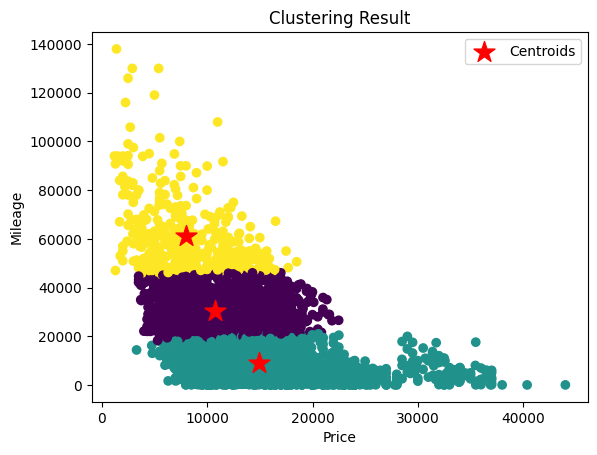

In [27]:
# 클러스터링 결과 시각화
import matplotlib.pyplot as plt

# 4800여개의 데이터를 점 찍는 작업입니다.
plt.scatter(x = df_new['price'], y = df_new['mileage'], c=y_km, cmap='viridis')  # x, y, c에 값을 집어넣어주세요

# 각 cluster의 중심을 점 찍는 작업입니다.
#x에는 price가 들어가니 0번 columm, y에는 mileage가 들어가니 2번 column의 중심점을 넣어줘야 한다
plt.scatter(x= centers[:, 0], y= centers[:, 2], marker='*', s=250, color='red', label='Centroids') # x,y에 값을 집어넣어주세요

plt.xlabel('Price')
plt.ylabel('Mileage')
plt.title('Clustering Result')
plt.legend()
plt.show()

# 아래부터는 배운 내용을 바탕으로 다양한 cluster 분석을 진행해주세요.

1. price, year, mileage를 특성으로 갖는 3차원 데이터였던 것을 price와 mileage를 기준으로 하는 2차원 데이터로 차원 축소를 하였다
2. 하이퍼파라미터(n_cluster)를 3으로 설정하여 3가지 군집으로 나뉘었고 각 군집의 price를 x축으로, mileage를 y축으로 갖는 중심점이 표시되었다
3. 전체 데이터는 price가 증가할 때 mileage가 감소하는 경향에 따라 3가지 군집으로 구분된다